In [1]:
import numpy as np
import pandas as pd

import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import *

from sklearn.neural_network import MLPRegressor

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/local/lib/python3.5/dist-pac

In [2]:
train = pd.read_csv('data/sales_train.csv')
trainOG = pd.read_csv('data/sales_train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
items = pd.read_csv('data/items.csv')
item_categories = pd.read_csv('data/item_categories.csv')
shop = pd.read_csv('data/shops.csv')

In [4]:
print(train.shape)
print(test.shape)

(2935849, 6)
(214200, 3)


In [5]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
shop.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [10]:
# Remove duplicated rows
print('Before drop train shape:', train.shape)
train.drop_duplicates(subset=['date', 'date_block_num', 'shop_id', 'item_id', 'item_cnt_day'], keep='first', inplace=True)
train.reset_index(drop=True, inplace=True)
print('After drop train shape:', train.shape)

Before drop train shape: (2935849, 6)
After drop train shape: (2935825, 6)


In [11]:
# Check for outliers
print('item_price Stats')
print('Min: ', train.item_price.min())
print('Max: ', train.item_price.max())
print('Mean: ', train.item_price.mean())
print('Median: ', train.item_price.median())
print(' ')
print(train.item_price.value_counts().sort_index(ascending=False))

item_price Stats
Min:  -1.0
Max:  307980.0
Mean:  890.855786146
Median:  399.0
 
 307980.000000       1
 59200.000000        1
 50999.000000        1
 49782.000000        1
 42990.000000        4
 42000.000000        1
 41990.000000        3
 40991.000000        1
 40900.000000        1
 37991.000000        2
 36990.000000        4
 35991.000000        1
 35990.000000        3
 35490.000000        5
 35300.000000        5
 35192.000000        1
 34990.000000       12
 34490.000000        1
 33990.000000        1
 33490.000000        8
 32997.500000        1
 32990.000000       57
 32490.000000        4
 32437.000000        1
 32382.000000        1
 32199.000000       16
 32092.000000        1
 31990.000000       19
 31699.000000        1
 31599.000000        1
                  ... 
 4.400000            1
 4.333333            1
 4.300000            1
 4.235294            1
 4.142857            1
 4.055556            1
 4.029126            1
 4.000000          105
 3.800000            2

In [12]:
# Remove -1 and 307980
print('before train shape:', train.shape)
train = train[(train.item_price > 0) & (train.item_price < 300000)]
print('after train shape:', train.shape)

before train shape: (2935825, 6)
after train shape: (2935823, 6)


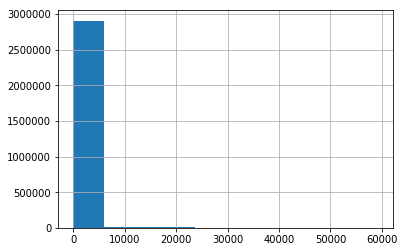

In [13]:
train.item_price.hist()


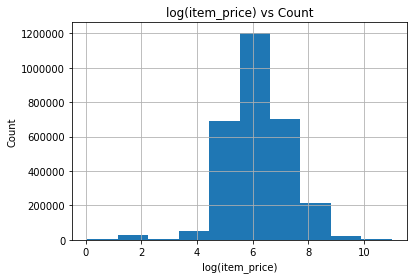

In [14]:
train.item_price.map(np.log1p).hist()
plt.xlabel('log(item_price)')
plt.ylabel('Count')
plt.title('log(item_price) vs Count')

In [15]:
print('item_cnt_day Stats')
print('Min: ', train.item_cnt_day.min())
print('Max: ', train.item_cnt_day.max())
print('Mean: ', train.item_cnt_day.mean())
print('Median', train.item_cnt_day.median())

item_cnt_day Stats
Min:  -22.0
Max:  2169.0
Mean:  1.242643034
Median 1.0


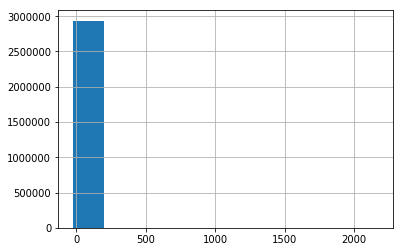

In [16]:
train.item_cnt_day.hist()

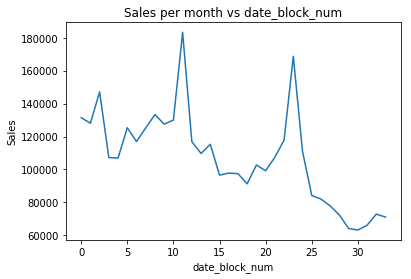

In [17]:
plt.plot(train.groupby('date_block_num').sum()['item_cnt_day'])
plt.title('Sales per month vs date_block_num')
plt.xlabel('date_block_num')
plt.ylabel('Sales')

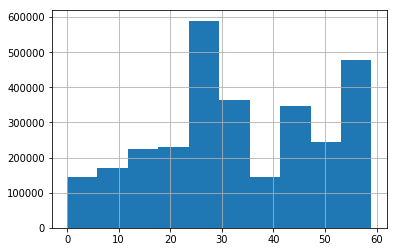

In [18]:
train.shop_id.hist()

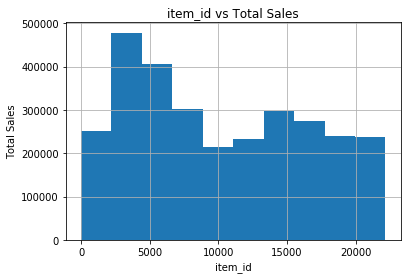

In [19]:
train.item_id.hist()
plt.title('item_id vs Total Sales')
plt.xlabel('item_id')
plt.ylabel('Total Sales')

In [20]:
print('Overall Counts:')
print('# of date_block_num:', train.date_block_num.nunique())
print('# of shop ids:', train.shop_id.nunique())
print('# of item ids:', train.item_id.nunique())
print('max # of total combinations:', train.date_block_num.nunique()*train.shop_id.nunique()*train.item_id.nunique())

Overall Counts:
# of date_block_num: 34
# of shop ids: 60
# of item ids: 21806
max # of total combinations: 44484240


In [21]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [22]:
# Create Text Features

feature_cnt = 25
items = items[['item_id', 'item_category_id']]
items.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


In [23]:
tfidf = feature_extraction.text.TfidfVectorizer(max_features=feature_cnt)
item_categories['item_category_name_len'] = item_categories['item_category_name'].map(len)  #Lenth of Item Category Description
item_categories['item_category_name_wc'] = item_categories['item_category_name'].map(lambda x: len(str(x).split(' '))) #Item Category Description Word Count
txtFeatures = pd.DataFrame(tfidf.fit_transform(item_categories['item_category_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    item_categories['item_category_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
item_categories.head()

,item_category_name,item_category_id,item_category_name_len,item_category_name_wc,item_category_name_tfidf_0,item_category_name_tfidf_1,item_category_name_tfidf_2,item_category_name_tfidf_3,item_category_name_tfidf_4,item_category_name_tfidf_5,...,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
0,PC - Гарнитуры/Наушники,0,23,3,0.0,0.0,0.0,1.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Аксессуары - PS2,1,16,3,0.0,0.0,0.0,0.0,0.780837,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Аксессуары - PS3,2,16,3,0.0,0.0,0.0,0.0,0.000000,0.780837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Аксессуары - PS4,3,16,3,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Аксессуары - PSP,4,16,3,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Make Monthly
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train = train.drop(['date','item_price'], axis=1)
train = train.groupby([c for c in train.columns if c not in ['item_cnt_day']], as_index=False)[['item_cnt_day']].sum()
train = train.rename(columns={'item_cnt_day':'item_cnt_month'})#Monthly Mean
shop_item_monthly_mean = train[['shop_id','item_id','item_cnt_month']].groupby(['shop_id','item_id'], as_index=False)[['item_cnt_month']].mean()
shop_item_monthly_mean = shop_item_monthly_mean.rename(columns={'item_cnt_month':'item_cnt_month_mean'})
#Add Mean Feature
train = pd.merge(train, shop_item_monthly_mean, how='left', on=['shop_id','item_id'])
#Last Month (Oct 2015)
shop_item_prev_month = train[train['date_block_num']==33][['shop_id','item_id','item_cnt_month']]
shop_item_prev_month = shop_item_prev_month.rename(columns={'item_cnt_month':'item_cnt_prev_month'})
shop_item_prev_month.head()
#Add Previous Month Feature
train = pd.merge(train, shop_item_prev_month, how='left', on=['shop_id','item_id']).fillna(0.)
#Items features
train = pd.merge(train, items, how='left', on='item_id')
#Item Category features
train = pd.merge(train, item_categories, how='left', on='item_category_id')
# #Shops features
# train = pd.merge(train, shop, how='left', on='shop_id')
train.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_cnt_month_mean,item_cnt_prev_month,item_category_id,item_category_name,...,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
0,0,0,32,1,2013,6.0,8.0,0.0,40,Кино - DVD,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,33,1,2013,3.0,3.0,0.0,37,Кино - Blu-Ray,...,0.0,0.520482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,35,1,2013,1.0,7.5,0.0,40,Кино - DVD,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,43,1,2013,1.0,1.0,0.0,40,Кино - DVD,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,51,1,2013,2.0,2.5,0.0,57,Музыка - MP3,...,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
test['month'] = 11
test['year'] = 2015
test['date_block_num'] = 34
#Add Mean Feature
test = pd.merge(test, shop_item_monthly_mean, how='left', on=['shop_id','item_id']).fillna(0.)
#Add Previous Month Feature
test = pd.merge(test, shop_item_prev_month, how='left', on=['shop_id','item_id']).fillna(0.)
#Items features
test = pd.merge(test, items, how='left', on='item_id')
#Item Category features
test = pd.merge(test, item_categories, how='left', on='item_category_id')
# #Shops features
# test = pd.merge(test, shop, how='left', on='shop_id')
test['item_cnt_month'] = 0.
test.head()

,ID,shop_id,item_id,month,year,date_block_num,item_cnt_month_mean,item_cnt_prev_month,item_category_id,item_category_name,...,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24,item_cnt_month
0,0,5,5037,11,2015,34,1.444444,0.0,19,Игры - PS3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,5320,11,2015,34,0.000000,0.0,55,Музыка - CD локального производства,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,11,2015,34,2.000000,1.0,19,Игры - PS3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5,5232,11,2015,34,1.000000,0.0,23,Игры - XBOX 360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,5268,11,2015,34,0.000000,0.0,20,Игры - PS4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
for c in ['item_category_name']:

    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[c].unique())+list(test[c].unique()))
    train[c] = lbl.fit_transform(train[c].astype(str))
    test[c] = lbl.fit_transform(test[c].astype(str))
    print(c)

item_category_name


In [43]:
x1 = train[train['date_block_num']<33]
y1 = np.log1p(x1['item_cnt_month'].clip(0.,20.))
col = [c for c in train.columns if c not in ['item_cnt_month']]
x1 = x1[col]

x2 = train[train['date_block_num']==33]
y2 = np.log1p(x2['item_cnt_month'].clip(0.,20.))
x2 = x2[col]

x5Mtrain = train[train['date_block_num']<5]
y5Mtrain = np.log1p(x5Mtrain['item_cnt_month'].clip(0.,20.))
x5Mtrain = x5Mtrain[col]

x5Mtest = train[train['date_block_num']==5]
y5Mtest = np.log1p(x5Mtest['item_cnt_month'].clip(0.,20.))
x5Mtest = x5Mtest[col]

x15Mtrain = train[train['date_block_num']<15]
y15Mtrain = np.log1p(x15Mtrain['item_cnt_month'].clip(0.,20.))
x15Mtrain = x15Mtrain[col]

x15Mtest = train[train['date_block_num']==15]
y15Mtest = np.log1p(x15Mtest['item_cnt_month'].clip(0.,20.))
x15Mtest = x15Mtest[col]

x25Mtrain = train[train['date_block_num']<25]
y25Mtrain = np.log1p(x25Mtrain['item_cnt_month'].clip(0.,20.))
x25Mtrain = x25Mtrain[col]

x25Mtest = train[train['date_block_num']==25]
y25Mtest = np.log1p(x25Mtest['item_cnt_month'].clip(0.,20.))
x25Mtest = x25Mtest[col]

x1.head()

x5MtrainL = train[train['date_block_num']<5]
y5MtrainL = np.log1p(x5MtrainL['item_cnt_month'].clip(0.,20.))
x5MtrainL = x5MtrainL[['date_block_num', 'shop_id', 'item_id']]

x5MtestL = train[train['date_block_num']==5]
y5MtestL = np.log1p(x5MtestL['item_cnt_month'].clip(0.,20.))
x5MtestL = x5MtestL[['date_block_num', 'shop_id', 'item_id']]

x15MtrainL = train[train['date_block_num']<15]
y15MtrainL = np.log1p(x15MtrainL['item_cnt_month'].clip(0.,20.))
x15MtrainL = x15MtrainL[['date_block_num', 'shop_id', 'item_id']]

x15MtestL = train[train['date_block_num']==15]
y15MtestL = np.log1p(x15MtestL['item_cnt_month'].clip(0.,20.))
x15MtestL = x15MtestL[['date_block_num', 'shop_id', 'item_id']]

x25MtrainL = train[train['date_block_num']<25]
y25MtrainL = np.log1p(x25MtrainL['item_cnt_month'].clip(0.,20.))
x25MtrainL = x25MtrainL[['date_block_num', 'shop_id', 'item_id']]

x25MtestL = train[train['date_block_num']==25]
y25MtestL = np.log1p(x25MtestL['item_cnt_month'].clip(0.,20.))
x25MtestL = x25MtestL[['date_block_num', 'shop_id', 'item_id']]

x1Linear = train[train['date_block_num']<33]
y1Linear = np.log1p(x1Linear['item_cnt_month'].clip(0.,20.))
x1Linear = x1Linear[['date_block_num', 'shop_id', 'item_id']]

x2Linear = train[train['date_block_num']==33]
x2Linear = x2Linear[['date_block_num', 'shop_id', 'item_id']]

fullsetX = train
fullsetY = np.log1p(fullsetX['item_cnt_month'].clip(0.,20.))
fullsetX = fullsetX[col] 

fulltestX = test
fulltestY = np.log1p(fulltestX['item_cnt_month'].clip(0.,20.))
fulltestX = fulltestX[col] 

In [28]:
x1.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month_mean,item_cnt_prev_month,item_category_id,item_category_name,item_category_name_len,...,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
0,0,0,32,1,2013,8.0,0.0,40,40,10,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,33,1,2013,3.0,0.0,37,37,14,...,0.0,0.520482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,35,1,2013,7.5,0.0,40,40,10,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,43,1,2013,1.0,0.0,40,40,10,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,51,1,2013,2.5,0.0,57,57,12,...,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
print('item_cnt_month Stats')
print('Min: ', train.item_cnt_month.min())
print('Max: ', train.item_cnt_month.max())
print('Mean: ', train.item_cnt_month.mean())
print('Median', train.item_cnt_month.median())

item_cnt_month Stats
Min:  -22.0
Max:  2253.0
Mean:  2.26718529286
Median 1.0


In [44]:
# Linear Regression Model
regr = linear_model.LinearRegression()
regr.fit(x5MtrainL,y5MtrainL)
y_pred = regr.predict(x5MtestL).clip(0.,20.)

print("Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y5MtestL.clip(0.,20.), y_pred)))

regr = linear_model.LinearRegression()
regr.fit(x15MtrainL,y15MtrainL)
y_pred = regr.predict(x15MtestL).clip(0.,20.)

print("Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y15MtestL.clip(0.,20.), y_pred)))

regr = linear_model.LinearRegression()
regr.fit(x25MtrainL,y25MtrainL)
y_pred = regr.predict(x25MtestL).clip(0.,20.)

print("Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y25MtestL.clip(0.,20.), y_pred)))

Root Mean squared error (RMSE): 0.45
Root Mean squared error (RMSE): 0.44
Root Mean squared error (RMSE): 0.43


In [31]:
# # Predict total monthly sales for final month of available training 
# # by removing final month from training data for test set


# # reg = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
# #                learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
# #                random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
# #                nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
# #                epsilon=1e-08)

# reg = MLPRegressor(hidden_layer_sizes=(100,), verbose=True)
# reg.fit(x1,y1)
# y_pred = reg.predict(x2).clip(0.,20.)

# print("Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.), y_pred)))

In [42]:
reg = MLPRegressor(hidden_layer_sizes=(36,), tol=0.00001, verbose=True)
reg.fit(x5Mtrain,y5Mtrain)
y_pred = reg.predict(x5Mtest).clip(0.,20.)

print("5 month - Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y5Mtest.clip(0.,20.), y_pred)))

reg = MLPRegressor(hidden_layer_sizes=(36,), tol=0.00001, verbose=True)
reg.fit(x15Mtrain,y15Mtrain)
y_pred = reg.predict(x15Mtest).clip(0.,20.)

print("15 month -Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y15Mtest.clip(0.,20.), y_pred)))

reg = MLPRegressor(hidden_layer_sizes=(36,), tol=0.00001, verbose=True)
reg.fit(x25Mtrain,y25Mtrain)
y_pred = reg.predict(x25Mtest).clip(0.,20.)

print("25 month - Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y25Mtest.clip(0.,20.), y_pred)))

Iteration 1, loss = 4646.16143895
Iteration 2, loss = 0.46531651
Iteration 3, loss = 0.17968782
Iteration 4, loss = 0.16886789
Iteration 5, loss = 0.32842561
Iteration 6, loss = 2.54442252
Iteration 7, loss = 3.17928253
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.
5 month - Root Mean squared error (RMSE): 0.48
Iteration 1, loss = 5.49061376
Iteration 2, loss = 1.80773435
Iteration 3, loss = 1.91373753
Iteration 4, loss = 1.48887943
Iteration 5, loss = 1.79546586
Iteration 6, loss = 1.60214987
Iteration 7, loss = 1.58682756
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.
15 month -Root Mean squared error (RMSE): 0.46
Iteration 1, loss = 612.68342267
Iteration 2, loss = 2.78756074
Iteration 3, loss = 2.57178603
Iteration 4, loss = 2.58019951
Iteration 5, loss = 2.26208761
Iteration 6, loss = 2.28560010
Iteration 7, loss = 2.39692791
Iteration 8, loss = 2.07583168
Iteration 9, loss = 1.97434494
Iterat